Osnabrück University - Computer Vision (Winter Term 2021/22) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack, Axel Schaffland

# Exercise Sheet 01: Basic Operations - Convolution

## Introduction

This is the first "real" homework sheet.

The homework sheets will usually be available on Tuesdays before the practice session and are supposed to be solved in groups of three. They have to be handed in before the next practice session in the following week. The exercises are then presented to your tutor in a small feedback session. To acquire the admission for the final exam, you will have to pass 𝑁−2 of the weekly provided exercise sheets.

Sign up for a group on Stud.IP if you have not already done so(See Participants -> Functions/Groups). The times mentioned there are the times for the feedback session of your group. If none of them fits, send any of the tutors an e-mail so we can try to arrange something.

Your group will have a group folder in Stud.IP under Documents. Upload your solutions there to hand them in.

This week's sheet should be solved and handed in before **Tuesday, November 9, 2021, 2:00pm**. Please upload your results to your group's Stud.IP folder.

## Assignment 1: Twodimensional Convolution [8 Points]

This exercise is purely theoretical and does not require implementation.

### a) Definition

Describe in your own words how convolution works.

Convolution is a process in which the pixels of an image are manipulated by a defined kernel matrix (filter matrix).
As the name suggest, the image (represented as matrix) and the kernel matrix interact together by the mathematical convolution function <p>
$$g(x,y)=\omega *f(x,y)=\sum _{dx=-a}^{a}{\sum _{dy=-b}^{b}{\omega (dx,dy)f(x+dx,y+dy)}}$$ <p>
where $g(x,y)$ is the filtered image, $f(x,y)$ is the original image and $\omega$ is the filter kernel. <br>
In visual space, a pixel's value is modified depending on the neighbors values. The amount of neighbors taken into account and the weight of the neighbor's values are dependant on the kernel size and values.

### b) Properties
Is convolution linear or non-linear? Is it homogenous or inhomogenous? Proof your answers.

<b>Proof of linearity:</b> <p>
    
To show (given the formula in a) ): $a \cdot g(x,y) = g(ax, ay)$ <p>

$$
\begin{eqnarray}
    a \cdot g(x,y) & = & a \cdot (\omega *f(x,y)) \\
                   & = & a \cdot \sum _{dx=-a}^{a}{\sum _{dy=-b}^{b}{\omega (dx,dy)f(x+dx,y+dy)}} \\
                   & = & \sum _{dx=-a}^{a}{\sum _{dy=-b}^{b} a \cdot {\omega (dx,dy)f(x+dx,y+dy)}} \\
                   & = & \sum _{dx=-a}^{a}{\sum _{dy=-b}^{b} {\omega (dx,dy)f(a \cdot (x+dx), a \cdot (y+dy)))}} \\
                   & = & g(ax,ay)
\end{eqnarray}
$$
Therefore convolution is linear.
    
<b>Proof on homogenous function:</b> <p>

To show: $g(\lambda x, \lambda y)=\lambda^\text{r} g(x, y)$ , where $\lambda$ is the scaling factor and $\text{r}$ the degree.

$$
\begin{eqnarray}
    g(\lambda x, \lambda y) & = &\sum _{dx=-a}^{a}{\sum _{dy=-b}^{b} {\omega (dx,dy)f(\lambda \cdot (x+dx), \lambda \cdot (y+dy)))}} \\
                            & \stackrel{\text{given linearity}}{=} & \lambda^1 g(x, y)
\end{eqnarray}
$$
Therefore convolution is homogenous of degree 1.

### c) Complexity

Assume an image $g$ of size $M\times N$ and a kernel $k$ of size $(2m+1)\times(2n+1)$. How many operations (additions and multiplications) are required to compute a convoluted image $g\ast k$ (of the same size as $g$)?

Using this kernel, there are $(2m + 1) \times (2n + 1)$ multiplications and $((2m + 1) \times (2n + 1)) - 1$ additions. This has to be computed for all $M \times N$ pixels, so in total there are
$(M \times N) \cdot ((2m + 1) \times (2n + 1) + (2m + 1) \times (2n + 1) - 1)$ operations. <p>

This gives a complexity of $\mathcal{O}(M \cdot N \cdot m \cdot n)$.

### d) Separability

What is a separable kernel? Describe, how it can be applied more efficiently. Compute the number of operations for getting $g\ast k$ (as in (c), but with a separable kernel $k$) and compare the results. Assume that the kernel is of size $m \times n$ and the image is of size $M \times N$. Compute the number of operations first for a single pixel and then extend your answer to the whole image. Ignore the normalization of the kernel, i.e. the fraction in front.

Note that here we define the kernel size as $m \times n$ as opposed to Assignment *1c)*. This is a shorter notation.

A separable kernel is a 2-dimensional kernel that can be separated into two 1-dimensional kernels (one row and one column vector). Then these filters can be applied separate to the image. So for all $M \times N$ pixels there are $m$ multiplications with the row filter and $n$ multiplications with the column vector. This gives a total number of $(M \times N) \cdot (m+n)$ multiplications.

## Assignment 2: Applying Convolution [4 Points]

In this exercise you will apply convolution with different kernels. You may use the function `scipy.ndimage.filters.convolve` to solve this task. Check the documentation to learn how to use this function. In this assignment you do not have to implement the convolution yourself. Realize the following filters, describe their effect and possible applications.

### a) Box filter

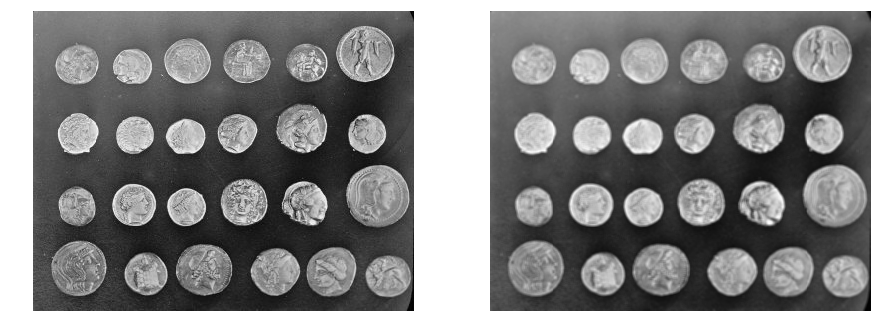

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy import ndimage

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

filtered_image = image # replace this by your solution
# YOUR CODE HERE
kernel = np.array([[1/9, 1/9, 1/9], 
                   [1/9, 1/9, 1/9], 
                   [1/9, 1/9, 1/9]])

filtered_image = ndimage.convolve(image, kernel)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

The box filter makes the image a bit more blurry. The box filter can be used to smooth the image and to filter out corrupted pixels.

### b) Gaussian filter

You may try different filter sizes.

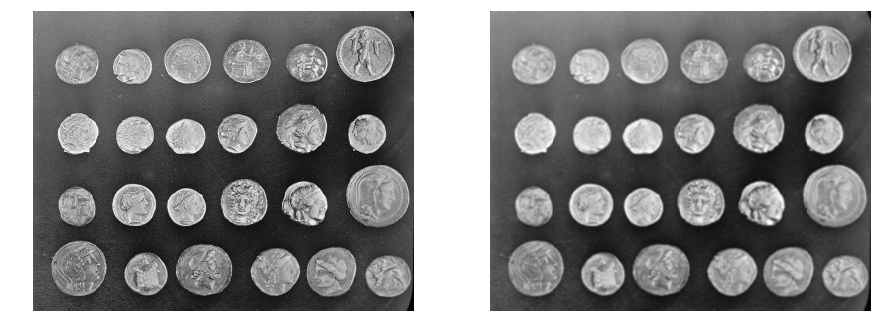

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data
from scipy import ndimage

# Load an image
#image = imread('some_file.png', pilmode = 'F')
image = data.coins().astype(np.float32)

filtered_image = image # replace this by your solution
# YOUR CODE HERE
kernel = np.array([[1/16, 2/16, 1/16], 
                   [2/16, 4/16, 2/16], 
                   [1/16, 2/16, 1/16]])

filtered_image = ndimage.convolve(image, kernel)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

The gaussian filter also makes the image a bit more blurry and can also be used to smooth an image.

### c) Sobel filter

Try horizontal, vertical, and diagonal sobel filters.

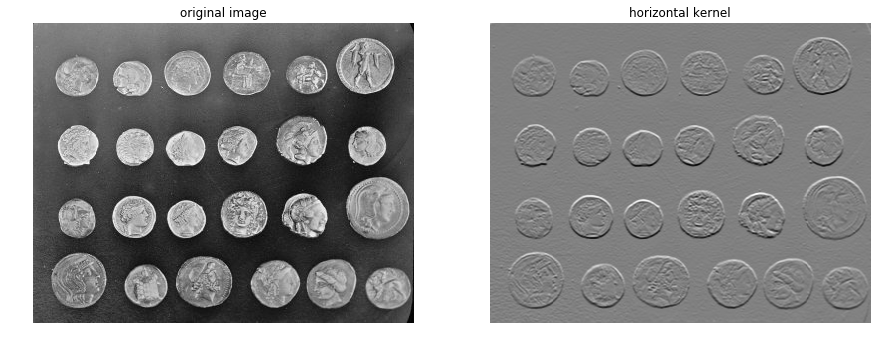

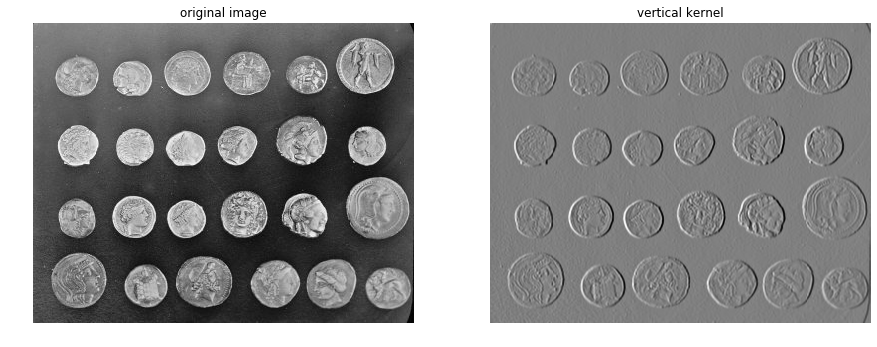

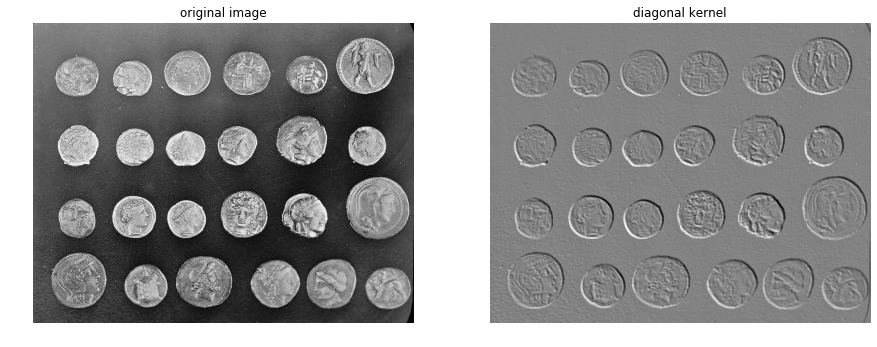

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = data.coins().astype(np.float32)

# define kernels; horizontal, vertical and diagonal sobel filters
kernel_hori = np.array([[1/4, 2/4, 1/4],
                        [  0,   0,   0],
                        [-1/4, -2/4, -1/4]])

kernel_vert = np.array([[1/4, 0, -1/4],
                        [2/4, 0, -2/4],
                        [1/4, 0, -1/4]])

kernel_diag = np.array([[  0,-1/4, -2/4],
                        [1/4,   0, -1/4],
                        [2/4, 1/4,    0]])

# loop through kernels and apply convolution
kernels = {"horizontal kernel": kernel_hori, "vertical kernel": kernel_vert, "diagonal kernel": kernel_diag}
for kernel_name, kernel_matrix in kernels.items():
    filtered_image = ndimage.convolve(image, kernel_matrix)

    # plot result
    fig = plt.figure(figsize=(15,7))
    a=fig.add_subplot(1,2,1)
    a.title.set_text('original image')
    plt.imshow(image, cmap = 'gray')
    plt.axis('off')
    a=fig.add_subplot(1,2,2)
    a.title.set_text('{}'.format(kernel_name))
    plt.imshow(filtered_image, cmap = 'gray')
    plt.axis('off')
    plt.show()

The sobel filter can be used to detect (vertical/horizontal/diagonal) edges.

### d) Unsharp Mask

One method to sharpen images is Unsharp Mask in which a negative unsharp mask is added to the original image as follows:

$$\text{Sharpened Image} = \text{Original Image} + (\text{Original Image} - \text{Unsharp Image}) \cdot \text{Amount}$$

The unsharp image can be computed by convolution with a Gaussian Kernel. Implement unsharp masking with a $5\times5$ Gaussian Kernel and a sharpening amount of $1.5$. Use the allready defined gaussian kernel "gauss_5".

Hint: To get good results the final images needs to be clipped to values between $0$ and $255$, i.e. all negative values are set to zero and all values bigger than $255$ are set to $255$.

You may experiment with large or negative sharpening amounts.

* Why is Unsharp Masking sharpening an image?
* What is the difference between normalizing and clipping an image?


Answer:
* Unsharp masking is a way to enhance the borders and lines which our eyes are optimized for. The perception of a sharper image is the result.
* Normalizing an image means to scale all pixel-values of that image. Clipping only affects pixel-values that are out of range of a given minimum- and maximum value.

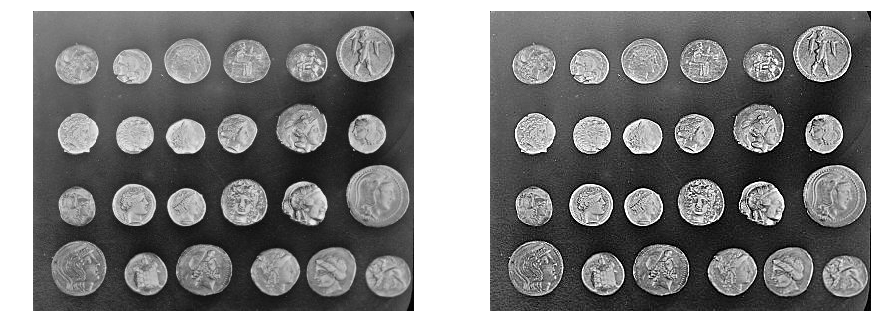

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from imageio import imread
from skimage import data

# Load an image
image = data.coins().astype(np.float32)

# Define sharpening amount
amount = 1.5

# Define the filters:
gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],
                              [4,16,24,16,4],
                              [6,24,36,24,6],
                              [4,16,24,16,4],
                              [1,4,6,4,1]])

# get gaussian filtered image
gauss_image = ndimage.convolve(image, gauss_5)

# create unsharp mask image
unsharped_mask_image = image + (image - gauss_image) * amount

# clipping image
unsharped_mask_image[unsharped_mask_image > 255] = 255
unsharped_mask_image[unsharped_mask_image < 0] = 0

# plot result
fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(unsharped_mask_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Assignment 3: Implementing Convolution [8 Points]

Now implement your own 2-dimensional convolution function. The function should take an image and a kernel a argument and return an image of the same size, containing the result of convolving the image with the kernel.

You may notice a problem at the boundaries of the image. Describe the problem and possible solutions. Implement at least one of them.

Then apply your function with different kernels. Compare the results with [Assignment 2](#Assignment-2:-Applying-Convolution-[4-Points]).

The problem is that with my method, the index of the array sometimes runs out of bound. This can be fixed differently:
* Zero padding
* Ignore values out of bound and dont apply the kernel to those pixels
* Mirror the image where the index runs out of bound
* Put a copy of the image where the index runs out of bound, so that it continues at the other side of the image (we chose this method)

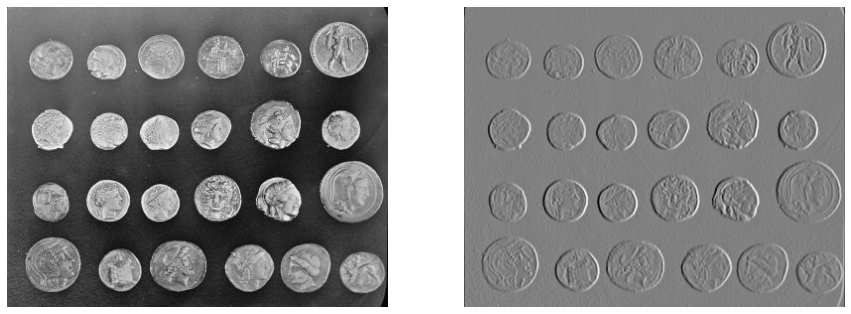

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from skimage import data

def my_convolve2d(img, kern):
    """Convolve an image with a kernel.

    Args:
        img (np.ndarray): The image, provided as a two-dimensional array.
        kern (np.ndarray): The kernel, also a two-dimensional array.
        
    Returns:
        result (np.ndarray): The convolved image. 
        
    """
    
    # store the image size for easier access
    M,N = img.shape
    # store the kernel size
    m,n = kern.shape
    # and also the half kernel size
    mh, nh = (m//2, n//2)
    
    # Initialize the result matrix
    result = np.zeros((M,N))
    
    # Compute the convolution
    # YOUR CODE HERE
    
    # Iterate through every pixel
    for row in range(M):
        for col in range(N):
            
            # value of the kernel multiplication
            val = 0
            
            # Iterate through every cell of the kernel
            for kern_row in range(-mh, mh + 1):
                for kern_col in range(-nh, nh + 1):
                    # Error handling: Index out of bound: Place a copy of the image to the place where the index
                    # is out of bound (or start from the beginning of the image where the index is out of bound)
                        
                    # kern[mh][nh] is the center of the kernel
                    val += kern[mh + kern_row][nh + kern_col] * img[(row + kern_row) % M][(col + kern_col) % N]
                    
            result[row][col] = val
    
    return result

# Apply your function to an image:
# Try different filters, compare the results with Assignment 2

# Load the image
image = data.coins().astype(np.float32)

kernel = np.array([[1/4, 0, -1/4], [2/4, 0, -2/4], [1/4, 0, -1/4]])
filtered_image = my_convolve2d(image,kernel)

#box_3 = 1/9 * np.asarray([[1,1,1],[1,1,1],[1,1,1]])
#filtered_image = my_convolve2d(image,box_3)

#kernel = np.array([[1/16, 2/16, 1/16], [2/16, 4/16, 2/16], [1/16, 2/16, 1/16]])
#filtered_image = my_convolve2d(image,kernel)

#gauss_5 = 1/256 * np.asarray([[1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1]])
#filtered_image = my_convolve2d(image,gauss_5)

fig = plt.figure(figsize=(15,7))
a=fig.add_subplot(1,2,1)
plt.imshow(image, cmap = 'gray')
plt.axis('off')
a=fig.add_subplot(1,2,2)
plt.imshow(filtered_image, cmap = 'gray')
plt.axis('off')
plt.show()

## Bonus Assignment: Optical music recognition (OMR)

If you solve this assignment you may leave out one of the other assignments. There will be similar assignments on most of the following sheets.  These bonus assignments are intended to show potential applications of the techniques you learnt in class. They are usually a bit more challenging and often there exist multiple ways to address them. Even if you do not intend to solve them, you may profit from at least taking a look.

**Background:** [Optical music recognition](https://en.wikipedia.org/wiki/Optical_music_recognition) "is a field of research that investigates how to computationally read musical notation in documents. The goal of OMR is to teach the computer to read and interpret sheet music and produce a machine-readable version of the written music score. Once captured digitally, the music can be saved in commonly used file formats, e.g. MIDI (for playback) and MusicXML (for page layout)."

**Data:** The freely available [CVC-MUSCIMA dataset](http://www.cvc.uab.es/cvcmuscima/index_database.html) contains 1000 high-quality images of handwritten music scores, transcribed by 50 different musicians. This dataset has been further extended into the [MUSCIMA++ dataset](https://ufal.mff.cuni.cz/muscima), which contains detailed annotations for 140 out of the 1000 pages. Both datasets are still used for developing and evaluating OMR systems.

**Task:** staff removal. The goal is to remove the staff, that is the horizontal lines on which musical symbols are placed, and to only keep the symbols. That is a common preprocessing step in many OMR approaches. We have provided three examples from the CVC-MUSCIMA dataset (`p001.png`, `p002.png`, and `p003.png`) along with the official solutions, showing the expected result (`p001-solution.png`, `p002-solution.png`, and `p003-solution.png`).

**Hints:**
* think what kind of filtering could help to solve this task
* experiment with different kernels, varying shape and size. They do not have to be quadratic.
* start working on a small image patch
* resize image if appropriate
* you may use function from libraries like [scikit-image](https://scikit-image.org/), e.g. the [`skimage.filters` module](https://scikit-image.org/docs/stable/api/skimage.filters.html), for working on this task

In [ ]:
# YOUR CODE HERE